In [ ]:
from simglucose.simulation.user_interface import simulate
from simglucose.simulation.scenario import CustomScenario
from datetime import datetime, timedelta
import pandas as pd

start_time = datetime.now()

meals = [
    (start_time + timedelta(hours=8), 50),  # Esmorzar
    (start_time + timedelta(hours=13), 80), # Dinar
    (start_time + timedelta(hours=20), 60)  # Sopar
]

scenario = CustomScenario(start_time=start_time, scenario=meals)

# Configura la simulació amb paràmetres Dexcom (5 min)
results = simulate(scenario=scenario, sim_time=timedelta(days=1))

# Converteix els resultats en un DataFrame
results_df = pd.DataFrame(results)
print(results_df.head())


Results will be saved in /Users/danasour/PycharmProjects/GLUSAP/notebooks/results/2024-10-29_10-13-20


KeyboardInterrupt: Interrupted by user

In [22]:
import random
from simglucose.controller.basal_bolus_ctrller import BBController
from datetime import datetime, timedelta
import pandas as pd
from simglucose.simulation import simulate  # Assegura't d'importar la funció simulate

# Defineix les variables clau per a la simulació
sim_time = timedelta(days=1)  # Temps total de simulació (1 dia per escenari)
start_time = datetime.now()  # Hora d'inici de la simulació

# Escenari personalitzat per simular múltiples dies
def generate_multiple_day_scenarios(start_time, num_days=7):
    scenarios = []
    for day in range(num_days):
        # Defineix horaris i quantitats de carbohidrats amb variacions
        breakfast_time = start_time + timedelta(hours=8 + random.uniform(-0.5, 0.5)) + timedelta(days=day)
        lunch_time = start_time + timedelta(hours=13 + random.uniform(-0.5, 0.5)) + timedelta(days=day)
        dinner_time = start_time + timedelta(hours=20 + random.uniform(-0.5, 0.5)) + timedelta(days=day)
        
        # Quantitats de carbohidrats aleatòries
        breakfast_carbs = random.randint(40, 60)
        lunch_carbs = random.randint(70, 90)
        dinner_carbs = random.randint(50, 70)

        day_scenario = [
            (breakfast_time, breakfast_carbs),
            (lunch_time, lunch_carbs),
            (dinner_time, dinner_carbs)
        ]
        scenarios.append(day_scenario)  # Afegim directament el dia_scenario
    return scenarios

num_days = 1
scenarios = generate_multiple_day_scenarios(start_time, num_days=num_days)

cgm_name = "Dexcom"  # Sensor Dexcom
cgm_seed = 1  # Aleatorietat del soroll del sensor
insulin_pump_name = "Insulet"  # Bomba d'insulina
controller = BBController()  # Controlador basal-bolus

all_results = []
for day, scenario in enumerate(scenarios, 1):
    print(f"Simulant escenari del dia {day}")
    
    results = simulate(
        sim_time=sim_time,
        scenario=scenario,
        controller=controller,
        cgm_name=cgm_name,
        cgm_seed=cgm_seed,
        insulin_pump_name=insulin_pump_name,
        start_time=start_time + timedelta(days=day-1),
        save_path=None,  # No guardem en fitxer
        animate=False,
        parallel=False
    )
    
    results_df = pd.DataFrame(results)
    
    cho_values = [meal[1] for meal in scenario]
    results_df['CHO'] = pd.Series(cho_values * (len(results_df) // len(cho_values)))
    
    all_results.append(results_df)

final_results = pd.concat(all_results, keys=[f'Day_{i+1}' for i in range(num_days)])
print(final_results.head())


Simulant escenari del dia 1
Results will be saved in /Users/danasour/PycharmProjects/GLUSAP/notebooks/results/2024-10-27_23-46-18


AttributeError: 'list' object has no attribute 'start_time'

In [12]:
import pandas as pd
import os

folder_path = '/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/2024-10-27_23-15-48'  #
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and 'processed' not in f]

# Processar cada fitxer CSV individualment
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processant fitxer: {file}")
    
    df = pd.read_csv(file_path)
    
    df = df[['Time', 'insulin', 'CHO', 'CGM']].copy()
    
    df['Time'] = pd.to_datetime(df['Time'])
    
    df['Time Event'] = df['CHO'].apply(lambda x: 'Meal' if x > 0 else 'No Meal')

    df['Day'] = df['Time'].dt.date
    
    df['Meal Label'] = pd.NA

    def label_meals(group):
        meal_counter = 1
        for index, row in group.iterrows():
            if row['CHO'] > 0:
                group.at[index, 'Meal Label'] = meal_counter
                meal_counter += 1
        return group

    df = df.groupby('Day').apply(label_meals)

    df = df[['Time', 'insulin', 'Meal Label', 'CGM']]
    
    output_path = os.path.join(folder_path, f'processed_{file}')  
    df.to_csv(output_path, index=False)
    
    print(f"Dades processades guardades en: {output_path}")


In [13]:
df = pd.read_csv("/Users/danasour/PycharmProjects/GLUSAP/notebooks/results/2024-10-27_23-15-48/adult#001.csv")

In [15]:
df['CHO'].value_counts()

CHO
0.0    480
Name: count, dtype: int64

1
Simulant escenari del dia 1
Results will be saved in /Users/danasour/PycharmProjects/GLUSAP/notebooks/results/2024-10-27_23-51-02
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Process ID: 6586
Simulation starts ...
Simulation Completed!
Simulation took 37.12852191925049 sec.


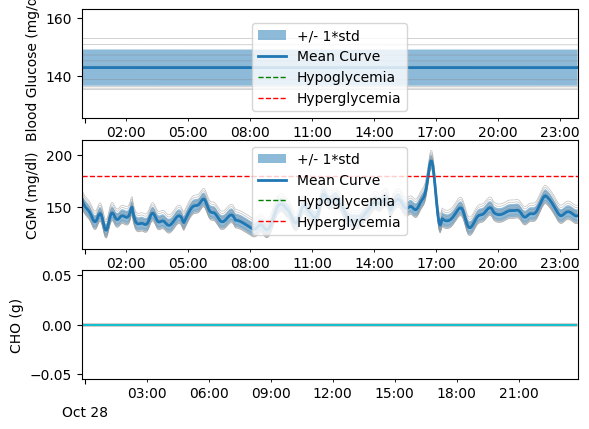

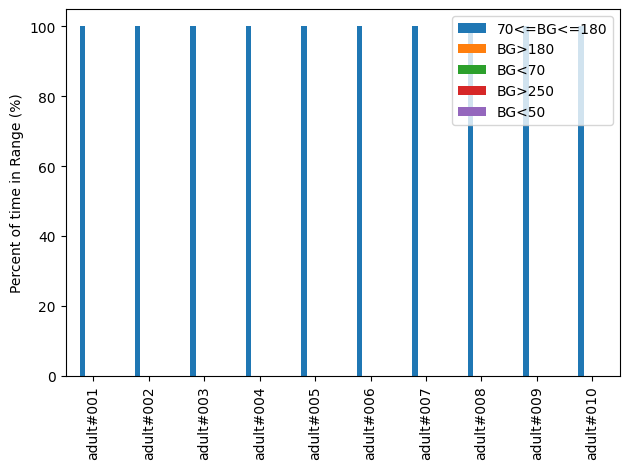

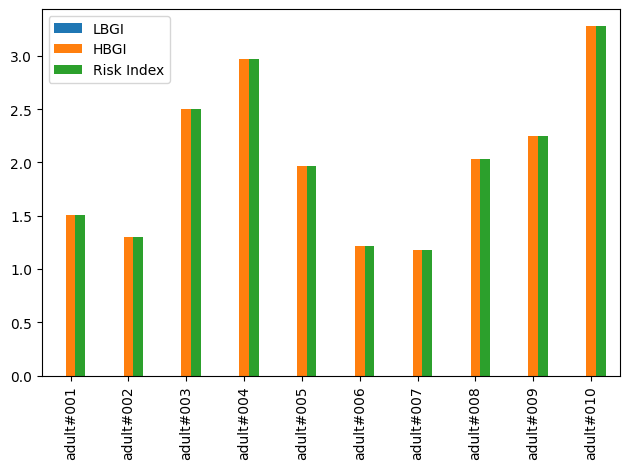

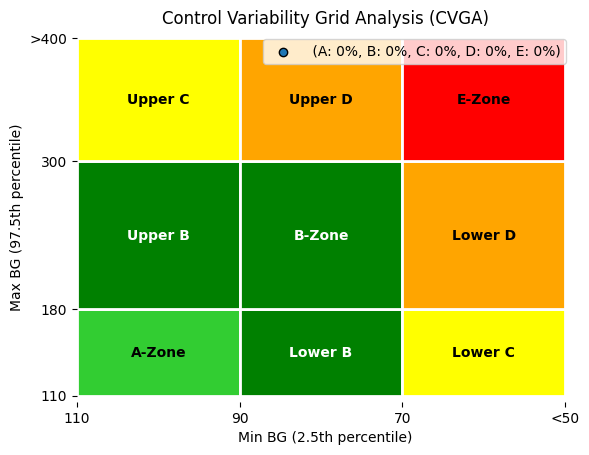

TypeError: 'CustomScenario' object is not iterable

In [1]:
import random
from simglucose.controller.basal_bolus_ctrller import BBController
from datetime import datetime, timedelta
import pandas as pd
from simglucose.simulation.user_interface import simulate
from simglucose.simulation.scenario import CustomScenario
from datetime import datetime, timedelta
import pandas as pd
sim_time = timedelta(days=1)  # Temps total de simulació (1 dia per escenari)
start_time = datetime.now()  # Hora d'inici de la simulació

def generate_multiple_day_scenarios(start_time, num_days=7):
    scenarios = []
    for day in range(num_days):
        breakfast_time = start_time + timedelta(hours=8 + random.uniform(-0.5, 0.5)) + timedelta(days=day)
        lunch_time = start_time + timedelta(hours=13 + random.uniform(-0.5, 0.5)) + timedelta(days=day)
        dinner_time = start_time + timedelta(hours=20 + random.uniform(-0.5, 0.5)) + timedelta(days=day)
        
        breakfast_carbs = random.randint(40, 60)
        lunch_carbs = random.randint(70, 90)
        dinner_carbs = random.randint(50, 70)

        day_scenario = [
            (breakfast_time, breakfast_carbs, 1),  # 1 per breakfast
            (lunch_time, lunch_carbs, 2),          # 2 per lunch
            (dinner_time, dinner_carbs, 3)         # 3 per dinner
        ]
        scenarios.append(day_scenario)  # Afegim directament el dia_scenario
    return scenarios

num_days = 1
scenarios = generate_multiple_day_scenarios(start_time, num_days=num_days)

cgm_name = "Dexcom"  # Sensor Dexcom
cgm_seed = 1  # Aleatorietat del soroll del sensor
insulin_pump_name = "Insulet"  # Bomba d'insulina
controller = BBController()  # Controlador basal-bolus

all_results = []
for day, scenario in enumerate(scenarios, 1):
    print(f"Simulant escenari del dia {day}")
    
    results = simulate(
        sim_time=sim_time,
        scenario=scenario,
        controller=controller,
        cgm_name=cgm_name,
        cgm_seed=cgm_seed,
        insulin_pump_name=insulin_pump_name,
        start_time=start_time + timedelta(days=day-1),
        save_path=None,  # No guardem en fitxer
        animate=False,
        parallel=False
    )

    cgm_data = []
    for entry in results:
        # Trobar l'àpat associat amb el temps
        meal_label = None
        for meal_time, cho, label in scenario:
            if meal_time <= entry.time < meal_time + timedelta(minutes=30):  # Considerem un interval de 30 minuts
                meal_label = label
                break
        
        cgm_data.append({
            'Time': entry.time,
            'CGM': entry.CGM,
            'Insulin': entry.insulin,  # Assegura't que `entry` té la propietat 'insulin'
            'CHO': cho if meal_label is not None else None,  # Obtén CHO associat
            'Meal Label': meal_label
        })

    cgm_df = pd.DataFrame(cgm_data)
    all_results.append(cgm_df)

final_results = pd.concat(all_results, keys=[f'Day_{i+1}' for i in range(num_days)])
print(final_results.head())
